# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# import numpy and pandas



# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [3]:
# Run this code:

fifa = pd.read_csv('fifa.csv')
fifa.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,Right,LF,4.0,94.0,88.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,Right,RCM,4.0,80.0,72.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,Right,RS,4.0,86.0,75.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,Right,RCB,3.0,76.0,75.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,Right,GK,3.0,43.0,60.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0


Let's examine the dataset by looking at the `head`.

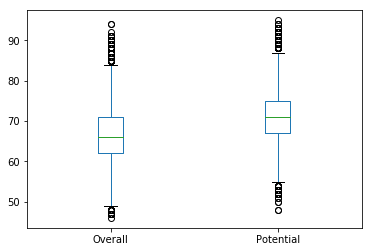

In [39]:
# Your code here:
fifa.tail(10)
fifa[['Overall', 'Potential']].plot.box()

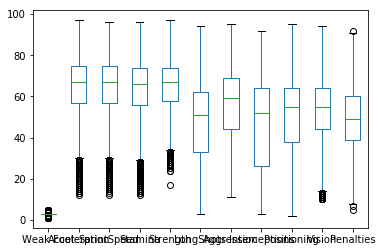

In [11]:
fifa.iloc[:, 8:].plot.box()

Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [30]:
# Your code here:
# def non_character(series):
#     for number in series:
#         number.strip('€')
#         if 'K' in number:
#             K = number.strip('K')/1000
#             return K
#         if 'M' in number:
#             M = number.strip('M')
#             return M
    

Value_numeric = fifa.Value.map(lambda x: x.strip('[€ M K]'))
Value_numeric
fifa['Value_numeric'] = Value_numeric
fifa['Value_numeric'] = fifa['Value_numeric'].astype('float64')
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Value_numeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [31]:
# Your code here:
#import statsmodels as sm
from statsmodels.formula.api import ols
#from statsmodels.stats.api import anova_lm
import statsmodels.api as sma


fifa = fifa.rename(columns = {'Preferred Foot': 'Preferred_foot'})

model = ols('Value_numeric ~ C(Position) + C(Preferred_foot)', data = fifa).fit()
anova_table = sma.stats.anova_lm(model, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(Position),8.767522e+06,26.0,4.031426,2.192419e-11
C(Preferred_foot),7.292211e+04,1.0,0.871795,3.504713e-01
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [4]:
# Your conclusions here:

#that the position of the player affects more 

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [32]:
# Your code here:\
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Value_numeric ~ C(Nationality)', data = fifa).fit()
anova_table = sm.stats.anova_lm(model, type = 1)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,4.292914e+07,263368.987135,3.202987,1.976253e-38
Residual,18043.0,1.483605e+09,82226.058289,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# There's a relation between the nationality and the calculated value

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [36]:
# Your code here:


fifa.dropna(inplace = True)

fifa.isnull().sum()


Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred_foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
Value_numeric     0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [37]:
# Your code here:

X = sm.add_constant(fifa[['SprintSpeed', 'Stamina']])
Y = fifa.Value_numeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Value_numeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Thu, 01 Aug 2019   Prob (F-statistic):             0.0116
Time:                        13:12:13   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

C:\Users\lponc\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:
# If I did things right this model doesn't explain anything of the variabilty of the data. But there's a relation 
# between this variables and the value. 


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [38]:
# Your code here:

X = sm.add_constant(fifa['Potential'])
Y = fifa.Value_numeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Value_numeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Thu, 01 Aug 2019   Prob (F-statistic):          9.15e-225
Time:                        13:22:41   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:
# The model explains little of the variance. Also thers a significant relation of the value with the potential. 


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

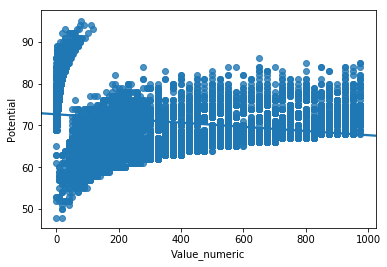

In [43]:
# Your code here:
import seaborn as sns

sns.regplot(fifa.Value_numeric, fifa.Potential)


In [ ]:
# Yes there a linear relation but at different levels. 